# Days dataset 

We'll include holidays, identify week days 

### Identifying the week days 

* Open the DataFrame file

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt 
%matplotlib inline
df = pd.read_csv('./DataSets/EnergyConsumption.csv', header=0)
df

,Time,Energy Usage
0,2021-01-27 11:00:00,8.03
1,2021-01-27 12:00:00,6.85
2,2021-01-27 13:00:00,8.86
3,2021-01-27 14:00:00,7.37
4,2021-01-27 15:00:00,7.67
...,...,...
6721,2021-11-03 12:00:00,6.68
6722,2021-11-03 13:00:00,7.26
6723,2021-11-03 14:00:00,6.81
6724,2021-11-03 15:00:00,8.81


### Changing the date to a datetime type object

In [7]:
def Convertstr2dt(data,col): 
    dates=[]
    for str_date in data[col]: 
        dti = dt.strptime(str_date, "%Y-%m-%d %H:%M:%S")
        dates.append(dti)
   
    #Delete the old column
    data.drop(col, inplace = True, axis=1) 

    #Insert the newone
    data.insert(0, col,dates)
    return data

DataFrame = Convertstr2dt(df,'Time')

### Detecting the week days

In [8]:
weekday = [] 
for day in DataFrame['Time']: 
    weekday.append(day.weekday())

#Add the new column
DataFrame.insert(1, 'Week Day',weekday)
DataFrame.head()

,Time,Week Day,Energy Usage
0,2021-01-27 11:00:00,2,8.03
1,2021-01-27 12:00:00,2,6.85
2,2021-01-27 13:00:00,2,8.86
3,2021-01-27 14:00:00,2,7.37
4,2021-01-27 15:00:00,2,7.67


### Decoding the week days

....Explanation by Angeles


* First we need to normalize all the numbers (that represent the days of the week) between 0 and 2phi 

In [9]:
import math
WeekDaysNorm = 2 * math.pi * DataFrame["Week Day"] / DataFrame["Week Day"].max()

DataFrame["cos_x"] = np.cos(WeekDaysNorm)
DataFrame["sin_x"] = np.sin(WeekDaysNorm)

DataFrame.head(100)

,Time,Week Day,Energy Usage,cos_x,sin_x
0,2021-01-27 11:00:00,2,8.03,-0.5,8.660254e-01
1,2021-01-27 12:00:00,2,6.85,-0.5,8.660254e-01
2,2021-01-27 13:00:00,2,8.86,-0.5,8.660254e-01
3,2021-01-27 14:00:00,2,7.37,-0.5,8.660254e-01
4,2021-01-27 15:00:00,2,7.67,-0.5,8.660254e-01
...,...,...,...,...,...
95,2021-01-31 10:00:00,6,2.24,1.0,-2.449294e-16
96,2021-01-31 11:00:00,6,1.98,1.0,-2.449294e-16
97,2021-01-31 12:00:00,6,2.52,1.0,-2.449294e-16
98,2021-01-31 13:00:00,6,1.96,1.0,-2.449294e-16


##### Plot 

* Sin vs Norm Week day 

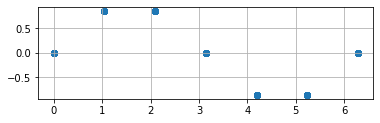

In [16]:
plt.axes().set_aspect('equal')
plt.scatter(WeekDaysNorm,DataFrame['sin_x'])
plt.grid()


* Cos vs Norm Week Day

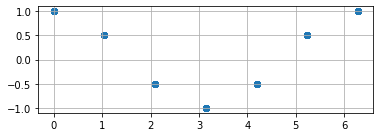

In [17]:
plt.axes().set_aspect('equal')
plt.scatter(WeekDaysNorm,DataFrame['cos_x'])
plt.grid()

* Sin vs Cos

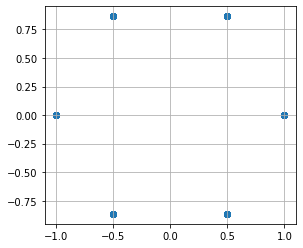

In [18]:
plt.axes().set_aspect('equal')
plt.scatter(DataFrame['cos_x'],DataFrame['sin_x'])
plt.grid()

### Identifying the holidays

In [19]:
from datetime import date 
import holidays 
holidaysList = [] 

for day, name in sorted(holidays.AT(state='9', years=2021).items()): 
    holidaysList.append(day)
    
print(holidaysList, len(holidaysList))

[datetime.date(2021, 1, 1), datetime.date(2021, 1, 6), datetime.date(2021, 4, 5), datetime.date(2021, 5, 1), datetime.date(2021, 5, 13), datetime.date(2021, 5, 24), datetime.date(2021, 6, 3), datetime.date(2021, 8, 15), datetime.date(2021, 10, 26), datetime.date(2021, 11, 1), datetime.date(2021, 12, 8), datetime.date(2021, 12, 25), datetime.date(2021, 12, 26)] 13


* Create a new empty column (filled with zeros) 

In [20]:
DataFrame.insert(1,"Holiday",np.zeros(len(DataFrame)))

In [21]:
for i,date in enumerate(DataFrame['Time']):
    if date in holidaysList: 
        DataFrame["Holiday"].loc[i] = 1 

/home/matias_dogliani/virtual_envs/BigData/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


* Check if it's worked

In [22]:
for i,date in enumerate(DataFrame["Time"]): 
    if DataFrame['Holiday'][i] >0:
        if date.day != DataFrame["Time"][i+1].day: 
            print(date)

2021-04-05 23:00:00
2021-05-01 23:00:00
2021-05-13 23:00:00
2021-05-24 23:00:00
2021-06-03 23:00:00
2021-08-15 23:00:00
2021-10-26 23:00:00
2021-11-01 23:00:00
